In [139]:
from astrology import * 
from person import *

In [141]:
person = Person(first_name= 'Ankit', last_name= 'Jha', city_of_birth='Bokaro Steel City', 
                country_of_birth='India', date_of_birth='16/07/1998', 
                time_of_birth='16:30', gender='Male')

In [143]:
time_obj = person.get_time_object()
geo_obj = person.get_geolocation_object()

In [145]:
print(person)

Name: Ankit Jha
Place of Birth: Bokaro steel city, India
Time of Birth: 16:30
Birth Coordinates: (23.6579595, 86.0839161)


In [147]:
astrology_obj = Astrology(person)

In [23]:
print("Julian Day:", astrology_obj._calculate_julian_day())
print("Ayanamsa:", astrology_obj._calculate_ayanamsa())
print("Zodiac Sign:", astrology_obj._calculate_zodiac_sign())
print("Moon Sign:", astrology_obj._calculate_moon_sign())
print("Ascendant:", astrology_obj._calculate_ascendant())
print("Nakshatra:", astrology_obj._calculate_nakshatra())
print("Vashya:", astrology_obj._calculate_vashya())
print("Yoni:", astrology_obj._calculate_yoni())
print("Gan:", astrology_obj._calculate_gan())
print("Nadi:", astrology_obj._calculate_nadi())
print("Sign Lord:", astrology_obj._calculate_sign_lord())
print("Nakshatra Lord:", astrology_obj._calculate_nakshatra_lord())
print("Charan:", astrology_obj._calculate_charan())
print("Tithi:", astrology_obj._calculate_tithi())
print("Tatva:", astrology_obj._calculate_tatva())
print("Name Alphabet:", astrology_obj._calculate_name_alphabet())
print("Paya:", astrology_obj._calculate_paya())

zodiac_sign = astrology_obj.zodiac_sign  
nakshatra = astrology_obj.nakshatra     

print("\nHelper Function Results:")
print("Zodiac Index:", astrology_obj._get_zodiac_index(zodiac_sign))
print("Nakshatra Index:", astrology_obj._get_nakshatra_index(nakshatra))
print("Zodiac Name for Index 0:", astrology_obj._get_zodiac_name(0))
print("Nakshatra Name for Index 0:", astrology_obj._get_nakshatra_name(0))

Julian Day: 2451011.1875
Ayanamsa: 24.7198845286959
Zodiac Sign: Karka
Moon Sign: Mesha
Ascendant: Meena
Nakshatra: Bharani
Vashya: Chatushpad
Yoni: Elephant
Gan: Manushya
Nadi: Madhya
Sign Lord: Moon
Nakshatra Lord: Venus
Charan: 2
Tithi: 23
Tatva: Water
Name Alphabet: Lu
Paya: Gold

Helper Function Results:
Zodiac Index: 3
Nakshatra Index: 1
Zodiac Name for Index 0: Mesha
Nakshatra Name for Index 0: Ashwini


In [175]:
import vedastro
from datetime import datetime, date, timedelta
import re

class NatalChart:
    def __init__(self, person):
        self.person = person

    def getplanetinfo(self, planet, time):
        """
        Get detailed information about a specific planet at a given time.
        
        :param planet: The planet to get information for
        :param time: The time object for which to calculate planetary position
        :return: A dictionary containing planet information
        """
        planet_data = vedastro.Calculate.AllPlanetData(planet, time)
        degree = str(planet_data[83])
        degree, minute, second = map(int, re.findall(r'\d+', degree))
        decimal_degrees = degree + (minute / 60) + (second / 3600)
        
        is_retrograde = str(planet_data[28]) == 'True'
        
        json_data = {
            "name": str(planet),
            "is_retrograde": is_retrograde,
            "house": int(str(planet_data[0]).lower().replace('house','')),
            "degree": decimal_degrees,
            "longitude": float(str(planet_data[61]))
        }
        
        return json_data

    def get_all_planetinfo(self, time):
        """
        Get information for all planets at a given time.
        
        :param time: The time object for which to calculate planetary positions
        :return: A list of dictionaries, each containing information about a planet
        """
        json_data = []
        planets = [
            vedastro.PlanetName.Sun,
            vedastro.PlanetName.Moon,
            vedastro.PlanetName.Mercury,
            vedastro.PlanetName.Venus,
            vedastro.PlanetName.Mars,
            vedastro.PlanetName.Jupiter,
            vedastro.PlanetName.Saturn,
            vedastro.PlanetName.Rahu,
            vedastro.PlanetName.Ketu
        ]
        
        for planet in planets:
            json_data.append(self.getplanetinfo(planet, time))
        
        return json_data

    def create_time_object(self, date_str):
        """
        Create a vedastro Time object for a given date.
        
        :param date_str: A date string in the format DD/MM/YYYY
        :return: A vedastro Time object, or None if the date is invalid
        """
        try:
            parsed_date = datetime.strptime(date_str, "%d/%m/%Y").date()
            date = parsed_date.strftime("%d/%m/%Y")
            time = "00:00"
            offset = self.person._get_gmt_offset()
            self.person.get_geolocation_object()
            time_str = f"{time} {date} {offset}"
            obj = vedastro.Time(time_str, self.person.geolocation)
            
            return obj
        except ValueError:
            print("Invalid date format or impossible date. Please use DD/MM/YYYY")
            return None 

    def get_transit_chart_date(self, current_date, next=365):
        """
        Generate transit chart data for a specified number of days starting from a given date.
        
        :param current_date: The starting date in DD/MM/YYYY format
        :param next: The number of days to generate transit data for (default 365)
        :return: A list of dictionaries, each containing the date and planetary information for that date
        """
        transit_data = []
        current_date = datetime.strptime(current_date, "%d/%m/%Y").date()
        
        for i in range(next):
            date = current_date + timedelta(days=i)
            date_str = date.strftime("%d/%m/%Y")
            time_obj = self.create_time_object(date_str)
            
            if time_obj:
                planet_info = self.get_all_planetinfo(time_obj)
                transit_data.append({
                    "date": date_str,
                    "planet_info": planet_info
                })
        
        return transit_data

    def get_birth_chart_details(self):
        dob  = self.person.get_time_object()
        dob_data = []
        if dob:
            planet_info = self.get_all_planetinfo(dob)
            return {
                    "planet_info": planet_info
                }


natal_chart = NatalChart(person)
#transit_data = natal_chart.get_transit_chart_date("01/01/2024",182)
# print(transit_data)

In [185]:
dob_data = natal_chart.get_birth_chart_details()

In [189]:
def generate_astro_prompt(dob_data, transit_data, additional_info=None):
    """
    Generates an AI prompt for astrological analysis based on birth chart and transit data.
    
    Args:
        dob_data (dict): Birth chart planetary positions and info
        transit_data (dict): Current transit positions
        additional_info (dict): Optional additional astrological calculations
    
    Returns:
        str: Formatted prompt for AI analysis
    """
    
    def format_planet_info(planet_data, chart_type="Birth"):
        positions = []
        for planet in planet_data['planet_info']:
            status = "retrograde" if planet['is_retrograde'] else "direct"
            positions.append(
                f"{planet['name']} in House {planet['house']} at {planet['degree']:.2f}° ({status})"
            )
        return f"{chart_type} Chart Positions:\n" + "\n".join(positions)

    # Create the main prompt structure
    prompt = f"""You are an experienced Vedic astrologer who provides practical, grounded advice based on astrological principles. Your analysis should focus on daily influences and practical guidance while avoiding specific predictions. Use the following chart information to provide insights:

{format_planet_info(dob_data, "Birth")}

Current Transits ({transit_data['date']}):
{format_planet_info(transit_data, "Transit")}

Key Aspects to Consider:
1. Current planetary transits through birth houses
2. Major planetary aspects and combinations
3. Current dasha/antardasha periods if relevant

Please provide:
1. A brief overview of the day's general energy
2. Areas of life that may need attention today
3. Practical suggestions for handling any challenges
4. Potential opportunities for growth or progress

Guidelines:
- Focus on practical advice rather than predictions
- Emphasize personal growth and self-awareness
- Acknowledge that astrological insights are tools for reflection, not absolute truths
- Keep suggestions actionable and grounded in reality

Please analyze these positions and provide meaningful insights that can help in making informed decisions today."""

    # Add additional info if provided
    if additional_info:
        relevant_factors = [
            'Nakshatra', 'Zodiac Sign', 'Moon Sign', 'Ascendant',
            'Gan', 'Nadi', 'Sign Lord', 'Nakshatra Lord'
        ]
        
        additional_details = "\n\nAdditional Chart Factors:"
        for factor in relevant_factors:
            if factor in additional_info:
                additional_details += f"\n{factor}: {additional_info[factor]}"
        
        prompt += additional_details

    return prompt

# Example usage with sample additional info
sample_additional_info = {
    'Nakshatra': 'Rohini',
    'Zodiac Sign': 'Taurus',
    'Moon Sign': 'Pisces',
    'Ascendant': 'Libra',
    'Gan': 'Dev',
    'Nadi': 'Madhya',
    'Sign Lord': 'Venus',
    'Nakshatra Lord': 'Moon'
}

# Generate the prompt
prompt = generate_astro_prompt(dob_data, transit_data[0], sample_additional_info)

In [195]:
prompts = [generate_astro_prompt(dob_data, transit_data_sample, sample_additional_info) for transit_data_sample in transit_data] 

In [315]:
openrouter_key = "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"
from openai import OpenAI
def get_prompt_output(prompt,date):
    client = OpenAI(
      base_url="https://openrouter.ai/api/v1",
      api_key=openrouter_key,
    )
    
    completion = client.chat.completions.create(
      extra_headers={
      },
      model="google/gemini-flash-1.5",
      messages=[
        {
          "role": "user",
          "content": prompt
        },                
        {
          "role": "system",
          "content": "You are an AI astrologer. Please focus on vedic compatiable languages. Use occassional sanskrit shhlokas and hidu god referenced and stories even if not relevant. Give markdown output only. Todays date is " + date
        }
      ]
    )
    return completion.choices[0].message.content

In [317]:
g = get_prompt_output(prompts[0],"1 January 2024")

In [329]:
transit_data[0]['date']

'01/01/2024'

In [331]:
outputs = []
for _,prompt in tqdm(zip(transit_data,prompts)):
    output = get_prompt_output(prompt,_['date'])
    outputs.append(output)


124it [16:24,  7.94s/it]


KeyboardInterrupt: 

In [334]:
len(outputs)

124

In [378]:
import markdown2
from jinja2 import Template
import pdfkit
from PyPDF2 import PdfMerger
import requests
from PIL import Image
from pathlib import Path
import io
import base64
import os

class AstroReportGenerator:
    def __init__(self, template_html, ganesha_url, wkhtmltopdf_path=None):
        self.template = Template(template_html)
        self.ganesha_url = ganesha_url
        self.wkhtmltopdf_path = wkhtmltopdf_path
        
        # Configure pdfkit with wkhtmltopdf path
        if wkhtmltopdf_path:
            self.pdfkit_config = pdfkit.configuration(wkhtmltopdf=wkhtmltopdf_path)
        else:
            self.pdfkit_config = None
            
        self.setup_directories()
        self.process_ganesha_image()
        
        # PDF options for better rendering
        self.pdf_options = {
            'page-size': 'A4',
            'margin-top': '0mm',
            'margin-right': '0mm',
            'margin-bottom': '0mm',
            'margin-left': '0mm',
            'encoding': 'UTF-8',
            'no-outline': None,
            'enable-local-file-access': None,
            'quiet': ''
        }
        
    def setup_directories(self):
        """Create necessary directories for output"""
        Path("temp").mkdir(exist_ok=True)
        Path("output").mkdir(exist_ok=True)
        
    def process_ganesha_image(self):
        """Process local Ganesha image and convert to base64"""
        try:
            # Open local image file
            img = Image.open(self.ganesha_url)
            
            # Resize image while maintaining aspect ratio
            basewidth = 300
            wpercent = (basewidth/float(img.size[0]))
            hsize = int((float(img.size[1])*float(wpercent)))
            img = img.resize((basewidth, hsize), Image.Resampling.LANCZOS)
            
            # Convert to base64
            buffered = io.BytesIO()
            img.save(buffered, format="PNG")
            self.ganesha_base64 = f"data:image/png;base64,{base64.b64encode(buffered.getvalue()).decode()}"
            
        except FileNotFoundError:
            print(f"Error: Image file not found at {self.ganesha_url}")
            raise
        except Exception as e:
            print(f"Error processing image: {str(e)}")
            raise
        
    def markdown_to_html(self, markdown_text):
        """Convert markdown to HTML with support for Hindi text"""
        return markdown2.markdown(markdown_text, extras=['tables', 'break-on-newline'])
        
    def create_page_html(self, content_html):
        """Apply the template to content"""
        return self.template.render(
            content=content_html,
            ganesha_image=self.ganesha_base64
        )
        
    def html_to_pdf(self, html_content, output_path):
        """Convert HTML to PDF using pdfkit with configuration"""
        try:
            # First save HTML to a temporary file
            temp_html_path = output_path.replace('.pdf', '.html')
            with open(temp_html_path, 'w', encoding='utf-8') as f:
                f.write(html_content)
            
            # Convert to PDF with configuration
            pdfkit.from_file(
                temp_html_path, 
                output_path, 
                options=self.pdf_options,
                configuration=self.pdfkit_config
            )
            
            # Clean up temporary HTML file
            os.remove(temp_html_path)
        except Exception as e:
            print(f"Error generating PDF: {str(e)}")
            raise
        
    def merge_pdfs(self, pdf_files, output_path):
        """Merge multiple PDFs into one"""
        merger = PdfMerger()
        for pdf in pdf_files:
            try:
                merger.append(pdf)
            except Exception as e:
                print(f"Error merging PDF {pdf}: {str(e)}")
                continue
        merger.write(output_path)
        merger.close()
        
    def generate_report(self, markdown_list):
        """Generate complete report from list of markdown strings"""
        pdf_files = []
        
        print(f"Starting to process {len(markdown_list)} pages...")
        
        # Process each markdown page
        for i, markdown_content in enumerate(markdown_list, 1):
            try:
                # Convert markdown to HTML
                content_html = self.markdown_to_html(markdown_content)
                
                # Apply template
                page_html = self.create_page_html(content_html)
                
                # Generate PDF
                pdf_path = f"temp/page_{i}.pdf"
                self.html_to_pdf(page_html, pdf_path)
                pdf_files.append(pdf_path)
                
                print(f"Processed page {i}/{len(markdown_list)}")
            except Exception as e:
                print(f"Error processing page {i}: {str(e)}")
                continue
        
        if pdf_files:
            print("Merging PDFs...")
            self.merge_pdfs(pdf_files, "output/final_report.pdf")
            
            # Cleanup temp files
            print("Cleaning up temporary files...")
            for pdf in pdf_files:
                try:
                    Path(pdf).unlink()
                except Exception as e:
                    print(f"Error removing temporary file {pdf}: {str(e)}")
            
            print("Report generation completed!")
        else:
            print("No PDFs were generated successfully.")

# Usage example:
if __name__ == "__main__":
    # Load your template HTML from file
    with open("/Users/ankitjh4/Downloads/astro-report-template.html", "r", encoding="utf-8") as f:
        template_html = f.read()
    
    # Initialize generator
    generator = AstroReportGenerator(
        template_html=template_html,
        ganesha_url="/Users/ankitjh4/Documents/ganesha.jpg"
    )
    
    # Your list of 124 markdown strings
    markdown_list = outputs
    
    # Generate the report
    generator.generate_report(markdown_list)

Starting to process 124 pages...
Processed page 1/124
Processed page 2/124
Processed page 3/124
Processed page 4/124
Processed page 5/124
Processed page 6/124
Processed page 7/124
Processed page 8/124
Processed page 9/124
Processed page 10/124
Processed page 11/124
Processed page 12/124
Processed page 13/124
Processed page 14/124
Processed page 15/124
Processed page 16/124
Processed page 17/124
Processed page 18/124
Processed page 19/124
Processed page 20/124
Processed page 21/124
Processed page 22/124
Processed page 23/124
Processed page 24/124
Processed page 25/124
Processed page 26/124
Processed page 27/124
Processed page 28/124
Processed page 29/124
Processed page 30/124
Processed page 31/124
Processed page 32/124
Processed page 33/124
Processed page 34/124
Processed page 35/124
Processed page 36/124
Processed page 37/124
Processed page 38/124
Processed page 39/124
Processed page 40/124
Processed page 41/124
Processed page 42/124
Processed page 43/124
Processed page 44/124
Processe

In [380]:
! pwd

/Users/ankitjh4/Documents/pyastro


In [382]:
transit_data[0]

{'date': '01/01/2024',
 'planet_info': [{'name': 'Sun',
   'is_retrograde': False,
   'house': 4,
   'degree': 15.635555555555555,
   'longitude': 255.63583333333332},
  {'name': 'Moon',
   'is_retrograde': False,
   'house': 11,
   'degree': 9.330555555555556,
   'longitude': 129.33083333333335},
  {'name': 'Mercury',
   'is_retrograde': True,
   'house': 3,
   'degree': 28.131666666666668,
   'longitude': 238.13194444444446},
  {'name': 'Venus',
   'is_retrograde': False,
   'house': 2,
   'degree': 8.168055555555554,
   'longitude': 218.16805555555555},
  {'name': 'Mars',
   'is_retrograde': False,
   'house': 3,
   'degree': 2.9630555555555556,
   'longitude': 242.96305555555554},
  {'name': 'Jupiter',
   'is_retrograde': False,
   'house': 8,
   'degree': 11.390555555555554,
   'longitude': 11.390833333333333},
  {'name': 'Saturn',
   'is_retrograde': False,
   'house': 5,
   'degree': 9.034166666666666,
   'longitude': 309.0341666666667},
  {'name': 'Rahu',
   'is_retrograde': Tr

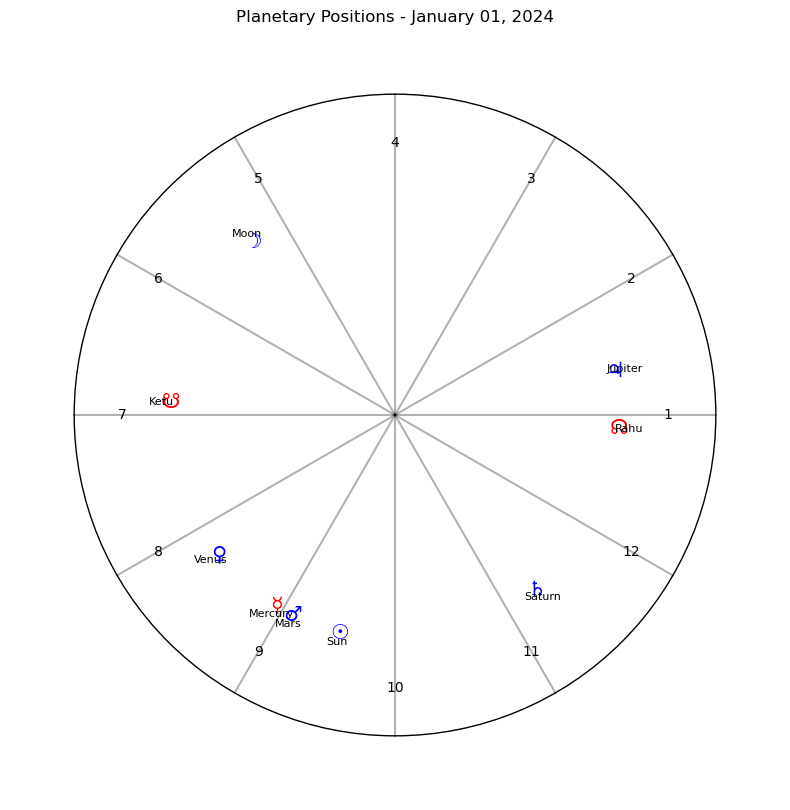

In [386]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon, Circle
import json
from datetime import datetime

def create_planet_chart(data):
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal')
    
    # Set the limits
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    
    # Remove axes
    ax.axis('off')
    
    # Draw the houses
    radius = 1
    angles = np.linspace(0, 2*np.pi, 13)[:-1]  # 12 points for houses
    
    # Calculate vertices for houses
    vertices = []
    for angle in angles:
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        vertices.append([x, y])
    
    # Draw house lines
    for i in range(12):
        plt.plot([0, vertices[i][0]], [0, vertices[i][1]], 'k-', alpha=0.3)
    
    # Draw outer circle
    circle = plt.Circle((0, 0), radius, fill=False, color='black')
    ax.add_artist(circle)
    
    # Add house numbers
    for i, (x, y) in enumerate(vertices, 1):
        # Position house numbers slightly inside the circle
        factor = 0.85
        plt.text(factor*x, factor*y, str(i), 
                horizontalalignment='center', 
                verticalalignment='center')
    
    # Plot planets
    planet_symbols = {
        'Sun': '☉', 'Moon': '☽', 'Mercury': '☿', 'Venus': '♀', 'Mars': '♂',
        'Jupiter': '♃', 'Saturn': '♄', 'Rahu': '☊', 'Ketu': '☋'
    }
    
    # Process planet data
    for planet in data['planet_info']:
        # Convert longitude to radians
        angle = np.radians(planet['longitude'])
        
        # Calculate position (slightly inside the circle)
        factor = 0.7  # Distance from center
        x = factor * np.cos(angle)
        y = factor * np.sin(angle)
        
        # Plot planet symbol
        symbol = planet_symbols.get(planet['name'], '•')
        color = 'red' if planet['is_retrograde'] else 'blue'
        plt.text(x, y, symbol, color=color, fontsize=15, 
                horizontalalignment='center', verticalalignment='center')
        
        # Add planet name
        name_factor = 0.73  # Slightly further out than symbol
        name_x = name_factor * np.cos(angle)
        name_y = name_factor * np.sin(angle)
        plt.text(name_x, name_y, planet['name'], fontsize=8,
                horizontalalignment='center', verticalalignment='center')
    
    # Add title with date
    date_obj = datetime.strptime(data['date'], '%d/%m/%Y')
    formatted_date = date_obj.strftime('%B %d, %Y')
    plt.title(f'Planetary Positions - {formatted_date}')
    
    # Save the plot
    plt.show()
    #plt.savefig('planet_chart.png', dpi=300, bbox_inches='tight')
    plt.close()

# Example usage
sample_data = {
    'date': '01/01/2024',
    'planet_info': [
        {'name': 'Sun', 'is_retrograde': False, 'house': 4, 'degree': 15.635555555555555, 'longitude': 255.63583333333332},
        {'name': 'Moon', 'is_retrograde': False, 'house': 11, 'degree': 9.330555555555556, 'longitude': 129.33083333333335},
        {'name': 'Mercury', 'is_retrograde': True, 'house': 3, 'degree': 28.131666666666668, 'longitude': 238.13194444444446},
        {'name': 'Venus', 'is_retrograde': False, 'house': 2, 'degree': 8.168055555555554, 'longitude': 218.16805555555555},
        {'name': 'Mars', 'is_retrograde': False, 'house': 3, 'degree': 2.9630555555555556, 'longitude': 242.96305555555554},
        {'name': 'Jupiter', 'is_retrograde': False, 'house': 8, 'degree': 11.390555555555554, 'longitude': 11.390833333333333},
        {'name': 'Saturn', 'is_retrograde': False, 'house': 5, 'degree': 9.034166666666666, 'longitude': 309.0341666666667},
        {'name': 'Rahu', 'is_retrograde': True, 'house': 7, 'degree': 26.696666666666665, 'longitude': 356.69694444444445},
        {'name': 'Ketu', 'is_retrograde': True, 'house': 1, 'degree': 26.696666666666665, 'longitude': 176.69694444444445}
    ]
}

# Create the chart
create_planet_chart(sample_data)

In [358]:
! pip install pypdf2

In [388]:
! pwd

/Users/ankitjh4/Documents/pyastro


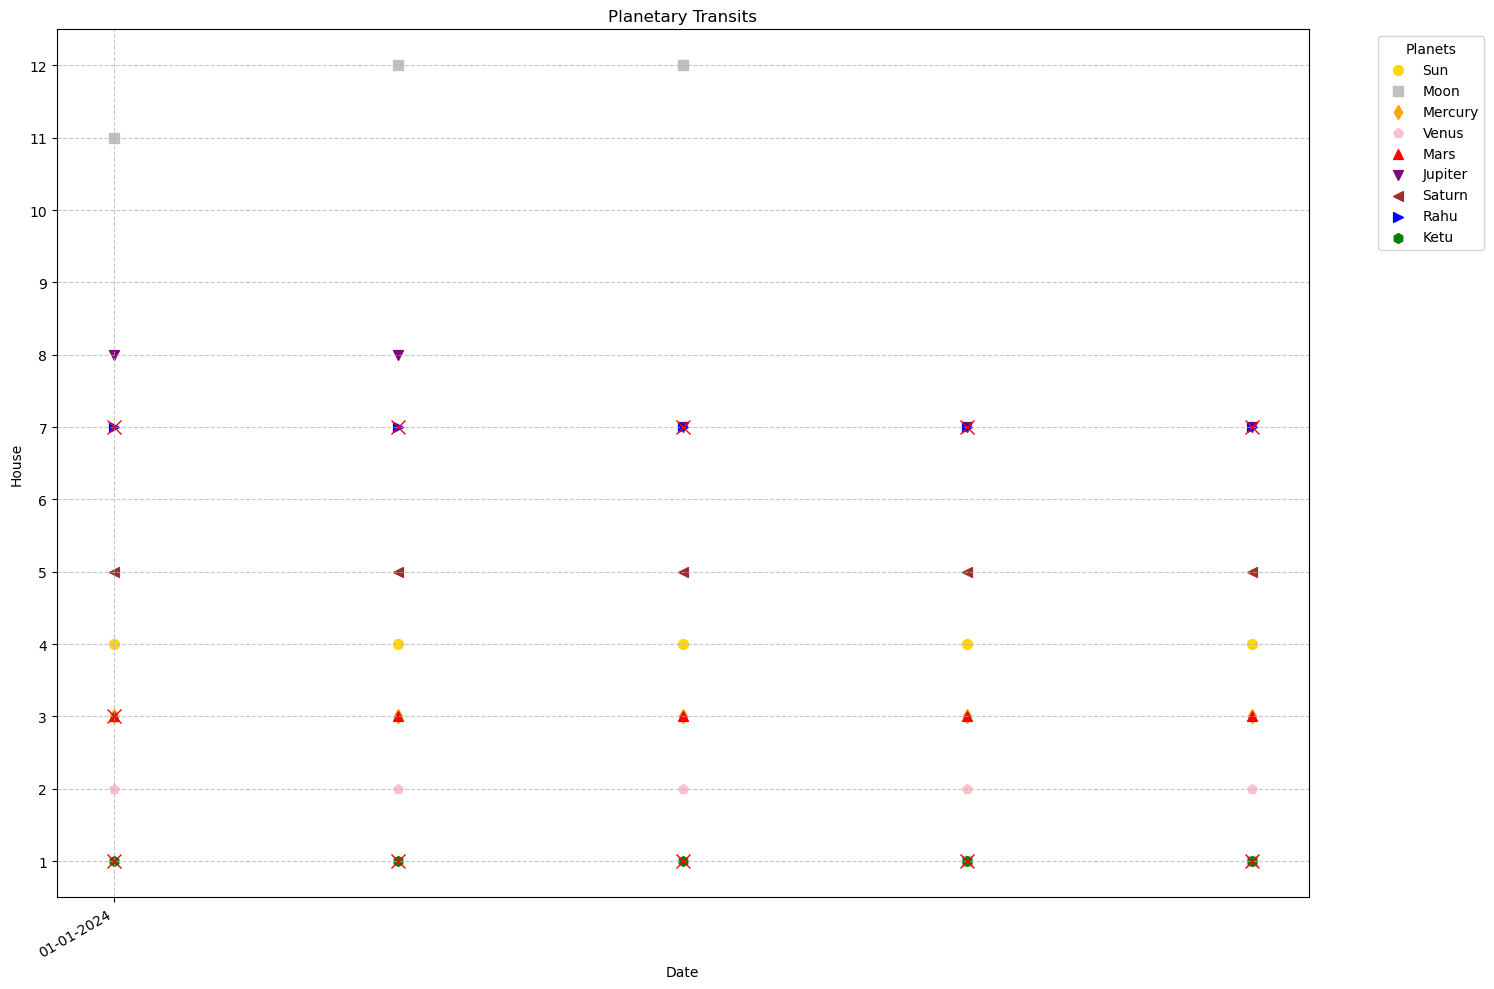

In [65]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

def plot_transit_chart(transit_data):
    """
    Plot a transit chart showing the movement of planets through houses over time.
    
    :param transit_data: A list of dictionaries, each containing date and planet info
    """
    # Prepare data
    dates = [datetime.strptime(d['date'], '%d/%m/%Y') for d in transit_data]
    planets = ['Sun', 'Moon', 'Mercury', 'Venus', 'Mars', 'Jupiter', 'Saturn', 'Rahu', 'Ketu']
    colors = ['gold', 'silver', 'orange', 'pink', 'red', 'purple', 'brown', 'blue', 'green']
    markers = ['o', 's', 'd', 'p', '^', 'v', '<', '>', 'h']

    # Create plot
    fig, ax = plt.subplots(figsize=(15, 10))

    # Plot each planet
    for i, planet in enumerate(planets):
        houses = [next(p for p in d['planet_info'] if p['name'] == planet)['house'] for d in transit_data]
        ax.scatter(dates, houses, c=colors[i], marker=markers[i], s=50, label=planet)

    # Customize the plot
    ax.set_ylim(0.5, 12.5)
    ax.set_yticks(range(1, 13))
    ax.set_ylabel('House')
    ax.set_xlabel('Date')
    ax.set_title('Planetary Transits')

    # Format x-axis to show dates nicely
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()  # Rotate and align the tick labels

    # Add legend
    ax.legend(title='Planets', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)

    # Highlight retrograde motion
    for d in transit_data:
        for p in d['planet_info']:
            if p['is_retrograde']:
                date = datetime.strptime(d['date'], '%d/%m/%Y')
                ax.plot(date, p['house'], 'rx', markersize=10)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

plot_transit_chart(transit_data)

In [137]:
def analyze_planetary_positions(planet_data):
    #  It feels "at home" and gives positive effects. 
    EXALTATION = {
        'Sun': {'house': 1, 'degree': 10},      
        'Moon': {'house': 2, 'degree': 3},      
        'Mercury': {'house': 6, 'degree': 15},  
        'Venus': {'house': 12, 'degree': 27},   
        'Mars': {'house': 10, 'degree': 28},    
        'Jupiter': {'house': 4, 'degree': 5},   
        'Saturn': {'house': 7, 'degree': 20},   
        'Rahu': {'house': 3, 'degree': 0},      
        'Ketu': {'house': 9, 'degree': 0}       
    }
    
    # A planet is weak and struggles in a specific sign,
    DEBILITATION = {
        'Sun': {'house': 7, 'degree': 10},      
        'Moon': {'house': 8, 'degree': 3},      
        'Mercury': {'house': 12, 'degree': 15}, 
        'Venus': {'house': 6, 'degree': 27},    
        'Mars': {'house': 4, 'degree': 28},     
        'Jupiter': {'house': 10, 'degree': 5},  
        'Saturn': {'house': 1, 'degree': 20},   
        'Rahu': {'house': 9, 'degree': 0},      
        'Ketu': {'house': 3, 'degree': 0}      
    }
    
    NATURAL_BENEFICS = ['Jupiter', 'Venus', 'Moon']
    NATURAL_MALEFICS = ['Saturn', 'Mars', 'Rahu', 'Ketu']
    DUAL_NATURE = ['Mercury', 'Sun']  
    
    HOUSE_STRENGTHS = {
        'Sun': {
            'strong': [1, 5, 9, 10],      
            'weak': [6, 8, 12],           
            'neutral': [2, 3, 4, 7, 11]
        },
        'Moon': {
            'strong': [2, 4, 7, 10],      
            'weak': [6, 8, 12],           
            'neutral': [1, 3, 5, 9, 11]
        },
        'Mercury': {
            'strong': [1, 4, 7, 10],      
            'weak': [6, 8, 12],           
            'neutral': [2, 3, 5, 9, 11]
        },
        'Venus': {
            'strong': [1, 2, 4, 5, 9],    
            'weak': [6, 8, 12],           
            'neutral': [3, 7, 10, 11]
        },
        'Mars': {
            'strong': [1, 4, 7, 10],      
            'weak': [6, 8, 12],           
            'neutral': [2, 3, 5, 9, 11]
        },
        'Jupiter': {
            'strong': [1, 4, 7, 10, 5, 9], 
            'weak': [6, 8, 12],            
            'neutral': [2, 3, 11]
        },
        'Saturn': {
            'strong': [3, 6, 10, 11],     
            'weak': [1, 2, 4, 5, 7, 8, 9],
            'neutral': [12]
        },
        'Rahu': {
            'strong': [3, 6, 10, 11],     
            'weak': [1, 2, 4, 5, 7, 8, 9],
            'neutral': [12]
        },
        'Ketu': {
            'strong': [3, 6, 10, 11],     
            'weak': [1, 2, 4, 5, 7, 8, 9],
            'neutral': [12]
        }
    }

    def analyze_planet(planet):
        name = planet['name']
        house = planet['house']
        degree = planet['degree']
        is_retrograde = planet['is_retrograde']
        
        analysis = {
            'planet': name,
            'house': house,
            'is_retrograde': is_retrograde,
            'strength': 'neutral',
            'effects': [],
            'recommendations': []
        }
        
        if house in HOUSE_STRENGTHS[name]['strong']:
            analysis['strength'] = 'strong'
            analysis['effects'].append(f"Well placed in {house}th house")
        elif house in HOUSE_STRENGTHS[name]['weak']:
            analysis['strength'] = 'weak'
            analysis['effects'].append(f"Challenged in {house}th house")
            
        if house == EXALTATION[name]['house']:
            if abs(degree - EXALTATION[name]['degree']) < 5:
                analysis['strength'] = 'very strong'
                analysis['effects'].append("Near exaltation degree")
        elif house == DEBILITATION[name]['house']:
            if abs(degree - DEBILITATION[name]['degree']) < 5:
                analysis['strength'] = 'very weak'
                analysis['effects'].append("Near debilitation degree")
                
        # Analyze retrograde effects
        if is_retrograde:
            if name in ['Jupiter', 'Venus', 'Mercury']:
                analysis['effects'].append("Retrograde motion strengthens the planet's spiritual and internal effects")
                analysis['recommendations'].append("Good time for introspection and revision of matters ruled by this planet")
            elif name in ['Mars', 'Saturn']:
                analysis['effects'].append("Retrograde motion can intensify challenging aspects")
                analysis['recommendations'].append("Exercise caution in matters ruled by this planet")
            elif name in ['Rahu', 'Ketu']:
                analysis['effects'].append("Natural retrograde motion - karmic influences are strong")
                
        # Natural benefic/malefic effects
        if name in NATURAL_BENEFICS:
            analysis['effects'].append("Natural benefic planet - generally positive influence")
        elif name in NATURAL_MALEFICS:
            analysis['effects'].append("Natural malefic planet - may present challenges")
        else:
            analysis['effects'].append("Dual nature planet - effects depend on associations")
            
        return analysis

    # Analyze all planets
    analysis_results = []
    for planet in planet_data:
        analysis = analyze_planet(planet)
        analysis_results.append(analysis)
        
    return analysis_results

def get_planet_data_dataframe(planet_data):
    planet_df = pd.DataFrame(analyze_planetary_positions(planet_data))
    planet_df['planet']  = planet_df['planet'].str.lower()
    planet_df['effects']  = planet_df['effects'].apply(lambda x: ". ".join(x))
    return planet_df
    
def get_basic_text_for_LLM(planet_data):
    results = analyze_planetary_positions(planet_data)
    space = "\n"
    analysis = ""
    for planet in results:
        analysis = analysis + space  + f"{planet['planet']} Analysis:"
        analysis= analysis + space  + f"House: {planet['house']}"
        analysis= analysis + space  + f"Retrograde: {'Yes' if planet['is_retrograde'] else 'No'}"
        analysis= analysis + space  + f"Strength: {planet['strength']}"
        analysis= analysis + space  + "Effects:"
        for effect in planet['effects']:
            analysis= analysis + space  + f" - {effect}"
        if planet['recommendations']:
            analysis= analysis + "Recommendations:"
            for rec in planet['recommendations']:
                analysis= analysis + space  + f" - {rec}"
    return analysis